In [30]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
sns.set(style='whitegrid')

In [33]:
# Carga del dataset y corrección de formato
df = pd.read_excel('/Users/juancarloscamperovilla/Documents/GitHub/MLOps/Fase_1/data/Residential-Building-Data-Set.xlsx')
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
1,81,1,85,1,1,3150,920,598.5,190,1010.84,16,1200,6713,56.2,61.52,6.11,320957.3,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628132.9,4986,55.5,60.78,3.94,297210.1,3663.5,61.5,179.63,9342.45,15,757.8,861.8,1755,8018,65,60.53,3538.71,31940.25,610502.7,6788,54.2,59.4,5.41,280451.7,3755.8,58.1,119.75,6228.3,15,795,818.5,1755,8001,63.69,58.55,3347.72,21293.5,589389.6,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.75,606524.2,7196,51.3,56.13,5.97,249110.7,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988.1,2200,410
2,84,1,89,4,1,7600,1140,3040,400,963.81,23,2900,3152,106,103.03,3.15,685697.5,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113.01,45966,1188995.8,2700,103,101.84,2.65,625829.2,4386.9,100.4,156.6,13188.23,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.64,2.76,602224.7,3819,97.2,104.4,8792.15,15,1298.8,1389.6,8699.73,8735,98.12,98.45,13596.37,22983,973523.7,3157,92.8,96.49,3.05,552124.4,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954628.6,3678,86.2,83.21,3.25,526596.4,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.37,44835,929027.1,5000,1000
3,78,1,81,4,1,4800,840,480,100,689.84,15,630,1627,41,41.25,1.74,160401.5,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524764.8,1580,40.3,40.84,1.15,150266.8,1149.5,34.1,214.35,4866.83,15,573.726531,680.29,1755,6714,43.4,36.45,1535.16,29299.5,466212.2,2628,39.3,40.21,1.52,143737.7,1284.5,33.5,142.9,3244.55,15,554.081966,663.97,1755,5827,41.79,34.76,1527.55,19533,409677.9,2374,38,39.43,0.92,134548.4,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312.5,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377828.6,1200,170
4,72,2,73,2,1,685,202,13.7,20,459.54,4,140,2580.93,12.1,10.03,1.24,38193.64,287.2,13.6,17.03,154.4,12,183.6,211.1,1612.95,1649,11.62,10.06,392.96,8435.75,141542.6,2952,11.6,8.5,1.99,35859.4,322.5,12.67,56.6,610.4,12,165.1,208.6,1504.36,1582,10.86,9.79,435.1,32776,129102.4,2649,11.4,6.97,2.25,32793.7,388.9,11.73,42.45,457.8,12,167.9,209.6,1450.47,1507,10.17,9.35,508.64,24582,123618,2312,10.6,5.44,2.58,30012.46,345.3,10.79,28.3,305.2,12,180.371507,158.45,1439,1450,9.91,8.85,590.64,16388,121857.2,1381,10,3.91,3,27231.21,316.5,9.85,14.15,152.6,12,197.679557,152.25,1442.31,1456,9.73,8.34,686.16,8194,122031.7,165,30
5,87,1,90,2,1,3000,800,1230,410,631.91,13,5000,6790,203.8,162.84,6.46,1640293,10855.3,229.3,393.3,69444.8,11,2738.8,3148,9248.4,9380,158.63,169.5,10082,49572,2318397,6370,190.3,154.36,5.33,1523166.6,12930,210.7,294.98,52083.6,11,2595.2,3000,9329.64,9396,148.76,159,9700,37179,1908975.7,5909,177.6,147.44,6.88,1451175.9,8146.1,188.9,196.65,34722.4,11,2284.4,2627.5,9297.06,9347,140.9,146.2,10149,24786,1681849.3,7045,160,141.34,4.72,1341072.8,8245,173.8,98.33,17361.2,11,2451.2,2526.4,9254.28,9306,136.56,138.8,9291,12393,1732937.5,5606,149.1,134.8,4.09,1284199.4,6622.5,147.6,432.4,73143.5,14,2220.6,2244.1,9231.76,9286,136.6,140.2,9821,48260,1734973.5,5500,700


In [34]:
# Se cambia el nombre de columnas para evitar duplicados
column_names = []
for i in range (0, len(df.columns)):
    column_names.append(df.columns[i])
for i in range (0, len(df.columns)):
    if df.columns[i] in column_names:
        column_names[i] = column_names[i] + '_' + str(i)
df.columns = column_names

In [35]:
# Se convierten a numéricas
for col in  df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [36]:
# Estadídticas de variables
df.describe()

,START YEAR_0,START QUARTER_1,COMPLETION YEAR_2,COMPLETION QUARTER_3,V-1_4,V-2_5,V-3_6,V-4_7,V-5_8,V-6_9,V-7_10,V-8_11,V-11_12,V-12_13,V-13_14,V-14_15,V-15_16,V-16_17,V-17_18,V-18_19,V-19_20,V-20_21,V-21_22,V-22_23,V-23_24,V-24_25,V-25_26,V-26_27,V-27_28,V-28_29,V-29_30,V-11_31,V-12_32,V-13_33,V-14_34,V-15_35,V-16_36,V-17_37,V-18_38,V-19_39,V-20_40,V-21_41,V-22_42,V-23_43,V-24_44,V-25_45,V-26_46,V-27_47,V-28_48,V-29_49,V-11_50,V-12_51,V-13_52,V-14_53,V-15_54,V-16_55,V-17_56,V-18_57,V-19_58,V-20_59,V-21_60,V-22_61,V-23_62,V-24_63,V-25_64,V-26_65,V-27_66,V-28_67,V-29_68,V-11_69,V-12_70,V-13_71,V-14_72,V-15_73,V-16_74,V-17_75,V-18_76,V-19_77,V-20_78,V-21_79,V-22_80,V-23_81,V-24_82,V-25_83,V-26_84,V-27_85,V-28_86,V-29_87,V-11_88,V-12_89,V-13_90,V-14_91,V-15_92,V-16_93,V-17_94,V-18_95,V-19_96,V-20_97,V-21_98,V-22_99,V-23_100,V-24_101,V-25_102,V-26_103,V-27_104,V-28_105,V-29_106,V-9_107,V-10_108
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.00000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,81.483871,2.190860,82.951613,2.586022,9.728495,1729.044355,426.114247,327.904086,163.118280,554.419839,6.266129,1088.118280,4210.998091,94.427957,88.050484,3.605323,6.411116e+05,4805.553495,98.677823,182.002124,18861.352796,14.069892,1327.458353,1466.269247,5934.194435,7805.037634,88.380134,87.073978,6604.944973,28296.934866,1.041556e+06,3990.014489,89.634409,84.383629,3.412769,6.002571e+05,4594.804301,92.148790,186.687876,18415.299301,14.180108,1249.017747,1385.723441,5723.675323,7713.588172,84.906102,83.434005,6462.124005,29169.714059,9.878810e+05,3885.660645,85.210215,81.180618,3.359973,5.631815e+05,4238.752957,86.491102,174.285780,16370.394677,14.263441,1188.981246,1314.671667,5589.884032,7623.298925,81.655027,79.712446,6349.516909,27456.405134,9.390451e+05,3865.851317,80.760484,78.06379,3.193118,5.253876e+05,3944.422849,81.535914,145.835188,13350.974973,14.314516,1140.085392,1245.397984,5522.351290,7537.037634,78.925349,76.317849,6131.099409,23469.629032,9.102971e+05,3757.436156,76.647312,74.524328,3.160108,4.938735e+05,3588.076882,76.562177,174.585457,15297.033522,14.454301,1081.951803,1187.484704,5403.213091,7431.560215,76.288817,73.446398,5915.576801,27551.883065,8.789713e+05,1387.432796,232.647849
std,4.182141,1.083382,4.223898,1.123442,6.563309,1802.371491,490.076498,563.544337,112.604343,275.105953,2.096495,995.826172,1776.645135,62.891433,49.364302,1.616244,5.421638e+05,3947.155806,73.015410,110.711378,21313.733301,1.526215,868.491300,957.244634,3543.375809,1987.196426,45.774134,51.733900,4244.446452,13870.611589,6.330130e+05,1623.468210,58.900266,46.907074,1.473947,5.103997e+05,3843.347388,66.322177,105.488736,20369.884598,1.417006,819.112881,887.128170,3575.052995,2049.682461,43.914286,49.532897,4289.692048,12200.639608,5.852443e+05,1576.339507,55.216053,44.804162,1.508873,4.802790e+05,3354.480333,60.883347,95.083233,17955

In [37]:
df.shape

(372, 109)

In [38]:
# Remover valores atípicos en percentiles 10 y 90%, ya que entre 25 y 75% resultaba muy agresivo
for variable in df.iloc[:,:-2].columns:
    percentile_10 = df[variable].quantile(0.10)
    percentile_90 = df[variable].quantile(0.90)
    iqr = percentile_90 - percentile_10
    upper_limit = percentile_90 + 1.5 * iqr
    lower_limit = percentile_10 - 1.5 * iqr
    outliers = df[(df[variable] < lower_limit) | (df[variable] > upper_limit)]
    df = df[~df[variable].isin(outliers[variable])]

In [39]:
df.shape

(321, 109)

In [40]:
corr_matrix = df.corr().abs()
# get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find features with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]

# drop highly correlated features
df.drop(to_drop, axis=1, inplace=True)

In [41]:
df.shape

(321, 53)

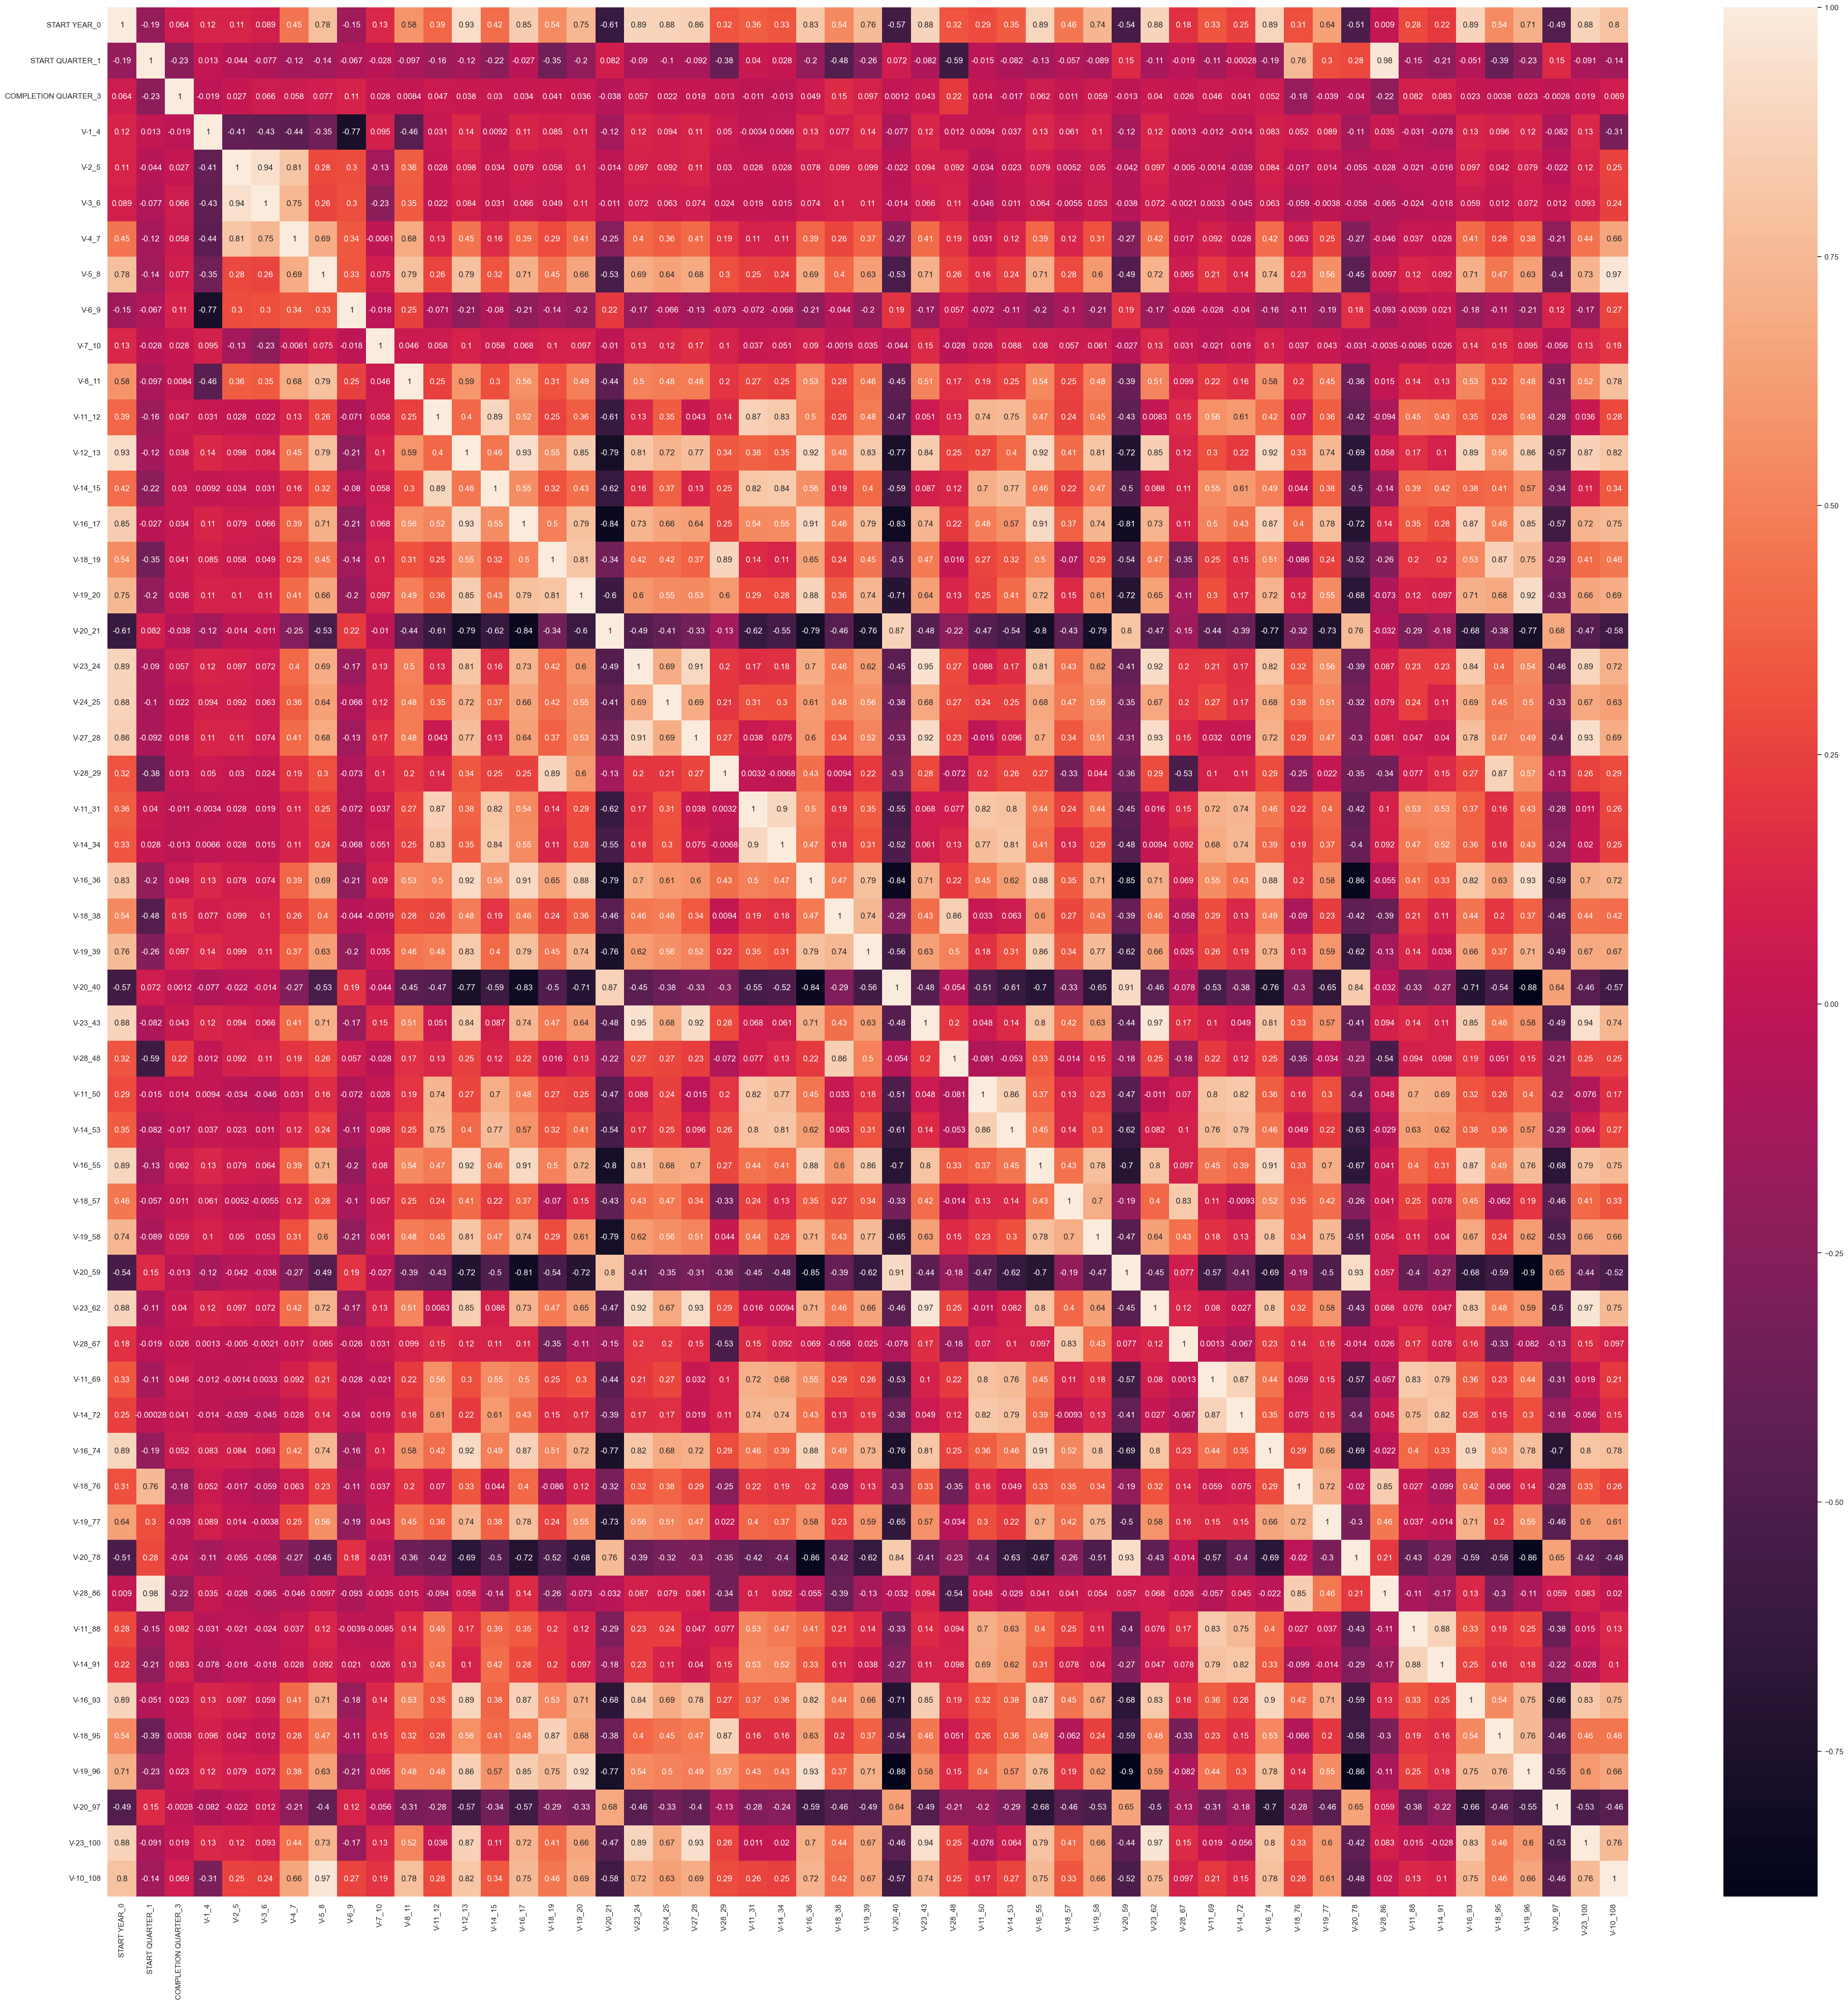

In [42]:
# Matriz de correlación para observar las variables
sns.set(rc={'figure.figsize':(50,50)}) 
matrix = df.corr(numeric_only=True)
sns.heatmap(matrix, annot=True)
plt.show()

In [43]:
# Separamos entre variables y targets
X = df.iloc[:,:-2]
Y = df.iloc[:,[-2,-1]]

In [44]:
standar = StandardScaler().fit(X)
standar_df = standar.transform(X)
standar_df = pd.DataFrame(standar_df, columns=X.columns)
total = pd.concat([standar_df, Y], axis=1)
total_components = standar_df.shape[1]

pca = PCA()
pca.fit(standar_df)
x_pca = pca.transform(standar_df)
x_pca_df = pd.DataFrame(x_pca, columns=pca.get_feature_names_out())

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
for i in range(0,len(cum_exp_var)):
    if cum_exp_var[i] >= 99:
        n_components = i + 1
        break


In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

In [46]:
standar = StandardScaler()
minmax = MinMaxScaler()
pca = PCA(n_components=n_components)

preprocessing = ColumnTransformer([
    #('dropper', 'drop', mycols),
    #('sqrt', FunctionTransformer(np.sqrt), skew_cols),
    ('minmax', minmax, make_column_selector(dtype_include=np.number)),
    ('stan', standar, make_column_selector(dtype_include=np.number)),
    ('pca', pca, make_column_selector(dtype_include=np.number))
    ], remainder = 'passthrough')

In [47]:
randf_model = make_pipeline(preprocessing, RandomForestRegressor())
randf_model.fit(Xtrain, ytrain)
y_predicted = randf_model.predict(Xtest)
print('r2_score: ' + str(r2_score(ytest, y_predicted)))
print('mean_squared_error: ' + str(mean_squared_error(ytest, y_predicted)))
joblib.dump(randf_model, '/Users/juancarloscamperovilla/Documents/GitHub/MLOps/Fase_1/models/regression_model_0.joblib')

r2_score: 0.9563651236553989
mean_squared_error: 710.3436847841906


['/Users/juancarloscamperovilla/Documents/GitHub/MLOps/Fase_1/models/regression_model_0.joblib']